## Visualization of Optimal hyperplane using cvxopt library

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from cvxopt import solvers  # quadratic solvers
from cvxopt import matrix

In [6]:
X = np.array([[0,0], [0, 1], [1, 0], [1, 1], [2, 0], [0, 2]]) # data points

X_ex = np.hstack((np.ones((X.shape[0], 1)), X))   # reshapes [5,2] point to [1, 5, 2]
print(X_ex.shape)

numfeatures = 2

y = np.array([-1, -1, -1, 1, 1, 1]) # Class labels

y = np.reshape(y, (y.shape[0], 1))

(6, 3)


### Define Ghpq

In [7]:
# convert all data to matrix object

inequality_constraint = matrix(y * -X_ex, tc='d')
rhs_inequality_constraint = matrix(-np.ones((X.shape[0], 1)), tc='d')
quadratic_part = matrix(np.identity(numfeatures + 1), tc='d')
linear_part = matrix(np.zeros(numfeatures + 1), tc='d')

In [8]:
sol = solvers.qp(quadratic_part, linear_part, inequality_constraint, rhs_inequality_constraint) # quadratic solver function with parameters

     pcost       dcost       gap    pres   dres
 0:  5.6250e-01  3.1042e+00  4e+00  2e+00  2e-15
 1:  1.4693e+00  5.1033e+00  3e-01  6e-01  5e-16
 2:  9.2454e+00  7.7766e+00  1e+00  3e-16  8e-14
 3:  8.5076e+00  8.4879e+00  2e-02  2e-16  2e-14
 4:  8.5001e+00  8.4999e+00  2e-04  3e-16  2e-14
 5:  8.5000e+00  8.5000e+00  2e-06  3e-16  1e-14
Optimal solution found.


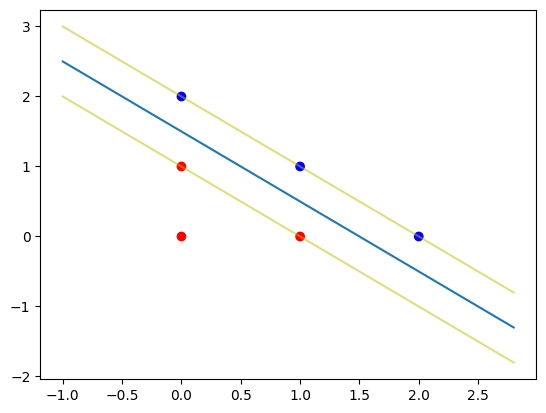

In [9]:
theta = np.array(sol['x'])

# decision boundaries and margins
_x = np.arange(-1, 3, 0.2)
_y = - (_x * theta[1] + theta[0])/theta[2]
_yp = (1 - _x * theta[1] - theta[0])/theta[2]
_yn = (-1 - _x * theta[1] - theta[0])/theta[2]

plt.scatter(X[:, 0], X[:, 1], c=['r' if _y < 1 else 'b' for _y in y])
plt.plot(_x, _y)
plt.plot(_x, _yn, c='y', alpha=0.5)
plt.plot(_x, _yp, c='y', alpha=0.5)